# Undisposed Mass Per Year

In [29]:
import pickle
import os
import json

with open('../../../scenario-properties-baseline.pkl', 'rb') as f:
    baseline = pickle.load(f)

# open results json file
with open('../../../results.json', 'r') as f:
    results = json.load(f)

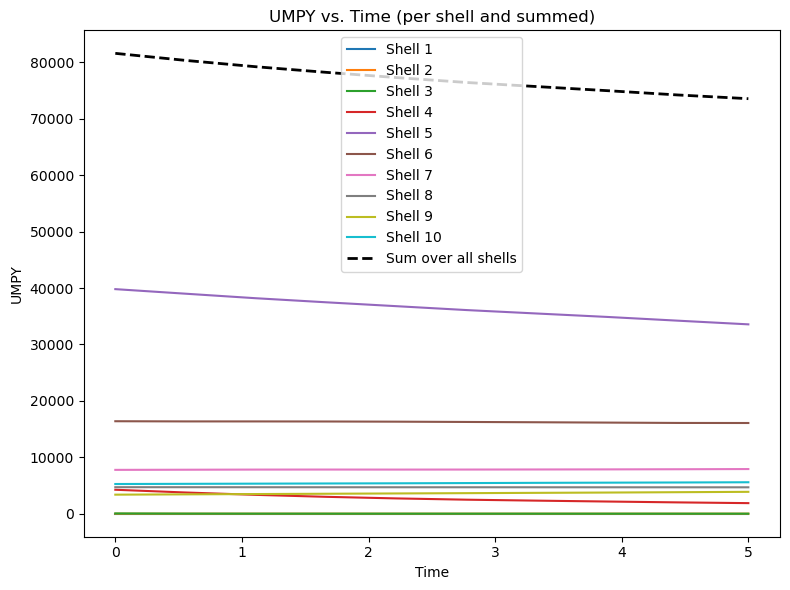

In [30]:
import numpy as np
import matplotlib.pyplot as plt 

umpy_dict = baseline.indicator_results['indicators']['umpy_indicator']

times = sorted(umpy_dict.keys())  # list of time points
n_times = len(times)

# --- 2) Convert each dictionary value into a row of shape (10,) ---
# because each entry is (10, 1), we can flatten to get shape (10,)
all_shells = np.array([umpy_dict[t].flatten() for t in times])  
# Now all_shells is shape (n_times, 10).

# --- 3) Plot each shell's UMPY over time ---
plt.figure(figsize=(8, 6))

for shell_idx in range(all_shells.shape[1]):
    plt.plot(times,
             all_shells[:, shell_idx],
             label=f'Shell {shell_idx+1}')

# --- 4) Sum across all shells for a single "total UMPY" line ---
shell_sum = np.sum(all_shells, axis=1)
plt.plot(times,
         shell_sum,
         label='Sum over all shells',
         color='k',
         linestyle='--',
         linewidth=2)

# --- 5) Format and show ---
plt.xlabel('Time')
plt.ylabel('UMPY')
plt.title('UMPY vs. Time (per shell and summed)')
plt.legend(loc='best')
plt.tight_layout()

# Note: because some values are np.inf, the y-axis may shoot up.
# If you want to avoid that, you could replace inf with np.nan:
# all_shells = np.nan_to_num(all_shells, nan=np.nan, posinf=np.nan, neginf=np.nan)

plt.show()

In [32]:
np.sum(shell_sum)

771649.4765166335

In [7]:
import numpy as np

def compute_umpy(t_sim, masses, lifetimes, X=4):
    """
    Computes UMPY at a given time step (or for a given t_sim) based on Eq. (1).

    Parameters
    ----------
    t_sim : float
        Study duration in years (e.g., from 0 up to current simulation time).
    masses : array-like
        List/array of masses (m_i) for each uncontrolled object.
    lifetimes : array-like
        List/array of lifetimes (life_i) for each uncontrolled object (in years).
    X : float
        Lifetime scaling exponent (default=4).

    Returns
    -------
    float
        The UMPY value for this time step.
    """

    # Convert masses and lifetimes to NumPy arrays if they aren't already
    masses = np.asarray(masses, dtype=float)
    lifetimes = np.asarray(lifetimes, dtype=float)

    # Make sure we don’t divide by zero if t_sim = 0
    if t_sim <= 0:
        return 0.0

    # Compute the exponential term for each object
    # e^( X * (lifetime / t_sim) ) - 1
    exponent_term = np.exp(X * (lifetimes / t_sim)) - 1.0

    # Denominator: e^X - 1
    denom = np.exp(X) - 1.0

    # The fraction inside the sum for each object
    fraction = exponent_term / denom  # same shape as masses

    # Weighted sum by mass
    weighted_sum = np.sum(masses * fraction)

    # Finally, multiply by 1 / t_sim
    umpy = (1.0 / t_sim) * weighted_sum
    return umpy

In [21]:
baseline.output.y

array([[9.00000000e+00, 9.00000000e+00, 9.00000000e+00, 9.00000000e+00,
        9.00000000e+00, 9.00000000e+00, 9.00000000e+00, 9.00000000e+00,
        9.00000000e+00, 9.00000000e+00],
       [4.70000000e+01, 4.70008457e+01, 4.74957402e+01, 4.79998559e+01,
        4.80229297e+01, 4.85020896e+01, 4.89791882e+01, 4.89699636e+01,
        4.89720916e+01, 4.89718219e+01],
       [2.22000000e+02, 2.24814442e+02, 7.05311385e+02, 1.67030413e+03,
        2.70305887e+03, 3.80225572e+03, 4.96177568e+03, 6.18113351e+03,
        7.46122676e+03, 8.80238759e+03],
       [4.52000000e+02, 4.57004189e+02, 4.66472668e+02, 4.76493827e+02,
        4.83541613e+02, 4.90085991e+02, 4.97612750e+02, 5.05653453e+02,
        5.12166561e+02, 5.19641089e+02],
       [5.60500000e+03, 6.31072524e+03, 7.15089770e+03, 8.13527470e+03,
        9.16995274e+03, 1.02507531e+04, 1.13784631e+04, 1.25503713e+04,
        1.38032790e+04, 1.51561362e+04],
       [1.10600000e+03, 1.38706964e+03, 1.68835128e+03, 2.02297088e+03,
   

In [ ]:
# Suppose output.t is an array of time points
time_points = baseline.output.t  # shape (T,)

# Suppose we have arrays/lists of masses and lifetimes for n_objs uncontrolled objects
species_list = [
    sp 
    for species_group in baseline.species.values() 
    for sp in species_group
]

# Extract masses and lifetimes as floats/arrays
masses = [sp.mass for sp in species_list]
lifetimes = [sp.deltat for sp in species_list]

umpy_values = np.zeros_like(time_points, dtype=float)

for i, t_now in enumerate(time_points):
    umpy_values[i] = compute_umpy(100, masses, lifetimes, X=4)

# Now umpy_values holds the UMPY for each time in your simulation
umpy_values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [18]:
lifetimes

[8, 8, None, None]

In [23]:
import numpy as np

def compute_umpy(t_sim, masses, lifetimes, X=4):
    """
    Computes UMPY at a given time step (or for a given t_sim) based on Eq. (1).
    """
    masses = np.asarray(masses, dtype=float)
    lifetimes = np.asarray(lifetimes, dtype=float)

    if t_sim <= 0:
        return 0.0

    exponent_term = np.exp(X * (lifetimes / t_sim)) - 1.0
    denom = np.exp(X) - 1.0
    fraction = exponent_term / denom

    weighted_sum = np.sum(masses * fraction)
    umpy = (1.0 / t_sim) * weighted_sum
    return umpy


times = results["times"]  # A list of time points

# We'll store the computed UMPY for each time
umpy_values = []

for i, t_now in enumerate(times):
    # We'll collect masses and lifetimes for ALL population_data entries
    masses = []
    lifetimes = []
    
    # Loop over each shell entry in population_data
    for shell_entry in results["population_data"]:
        sp_name = shell_entry["species"]
        
        # population at time index i:
        pop_i = shell_entry["populations"][i]
        
        # Retrieve mass, lifetime from species_attributes
        # (Be sure the species name in the JSON is in your attributes dict)
        attr = species_attributes.get(sp_name, None)
        if not attr:
            # If we find no attributes for this species, skip or handle error
            continue
        
        mass_per_obj = attr["mass"]
        life = attr["lifetime"]
        
        # "Effective" total mass = population * mass_per_obj
        total_mass_i = pop_i * mass_per_obj
        
        # Add to our lists
        masses.append(total_mass_i)
        lifetimes.append(life)
    
    # Now compute UMPY at time t_now
    umpy_val = compute_umpy(t_now, masses, lifetimes, X=4)
    umpy_values.append(umpy_val)

# Now umpy_values[i] corresponds to UMPY at time times[i].

NameError: name 'species_attributes' is not defined